# 종합실습2 이변량분석(y-숫자) : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### (2) 데이터 로딩

|변수명|설명|구분|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [ ]:
#가설 설정이 제일 어렵고 분석 쉽다

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Urban        400 non-null    object 
 9   US           400 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 31.4+ KB


In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [27]:
target = 'Sales' #판매량, 고정

## 1.숫자형 X --> Y

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### (1) Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

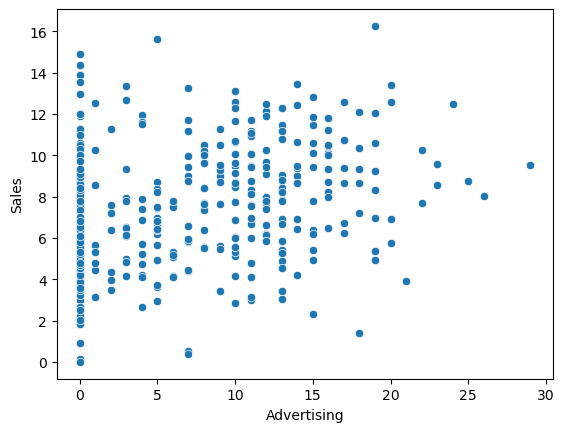

In [19]:
#광고량에 따라 판매량 영향이 있는가?
var = 'Advertising' #광고량

sns.scatterplot(x = var, y = target, data = data)
plt.show()

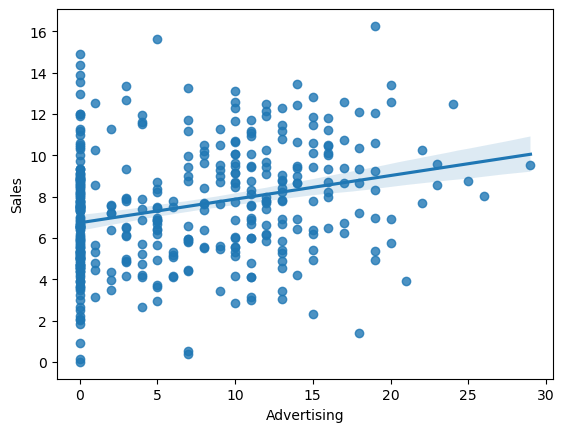

In [20]:
sns.regplot(x = var, y = target, data = data)
plt.show()
#저 회색부분이 오차범위 부분

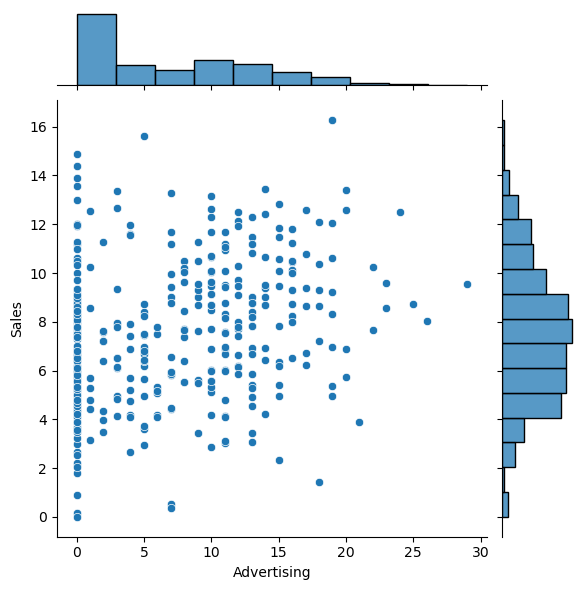

In [21]:
sns.jointplot(x = var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [11]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.377677110302732e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 0을 빼고 다시 해봐야한다
- 광고와 세일즈는 약한 상관관계가 있다.. pv로 볼때 유의미한 값으로 판단

### (2) Population -> Sales

1) 시각화 : scatter

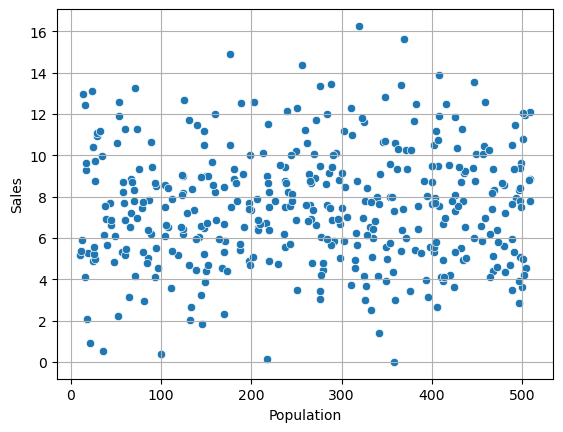

In [23]:
var = "Population"
sns.scatterplot(x = var, y = target, data = data)
plt.grid()
plt.show()

In [46]:
var = "Population"
def eda2_nn(data, target, var):
    sns.scatterplot(x = var, y = target, data = data)
    plt.grid()
    plt.show()
    result = spst.pearsonr(data[var], data[target])
    print(f"상관계수 : {result[0]}, p-value : {result[1]}")

In [ ]:
temp = data[var].unique()
d = []
for s in temp:
    d.append(data.loc[data[var] == s, target])
    print(spst.f_oneway(*d))

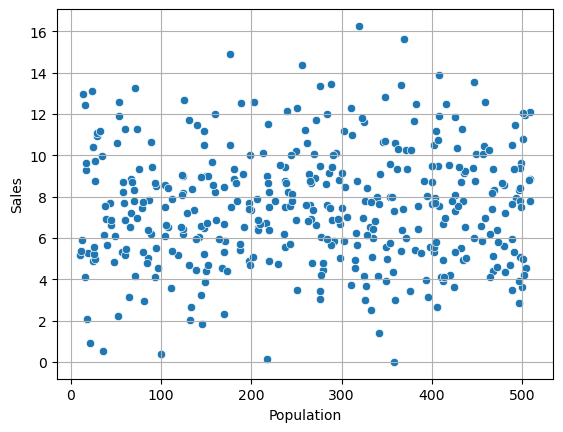

상관계수 : 0.0504709844720392, p-value : 0.31398160931903


In [47]:
eda2_nn(data, target, var)

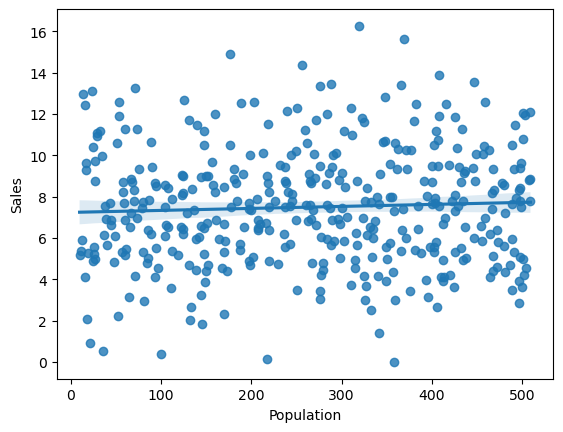

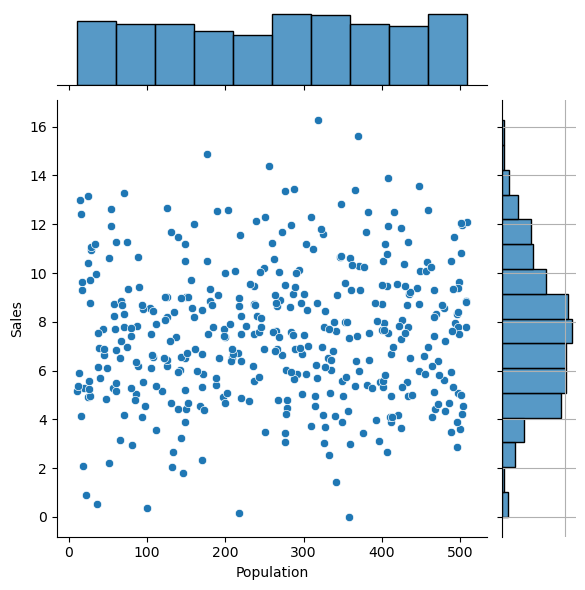

In [28]:
sns.regplot(x = var, y = target, data = data)
sns.jointplot(x = var, y = target, data = data)
plt.grid()
plt.show()
#저 회색부분이 오차범위 부분

2) 수치화 : 상관분석

In [26]:
result = spst.pearsonr(data[var], data[target])
print(f"상관계수 : {result[0]}, p-value : {result[1]}")
#상관계수가 0에 가까워서 강한 상관관계를 가진다. 다만 p-value가 0.05이상이라 유의미한 결과는 아니다

상관계수 : 0.0504709844720392, p-value : 0.31398160931903


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 인구수가 많다고 판매량이 많지 않다. 즉 판매량은 인구수와 상관 없다

### (3) Price -> Sales

1) 시각화 : scatter

In [48]:
#자사 지역별 판매가격(달러)
var = "Price"

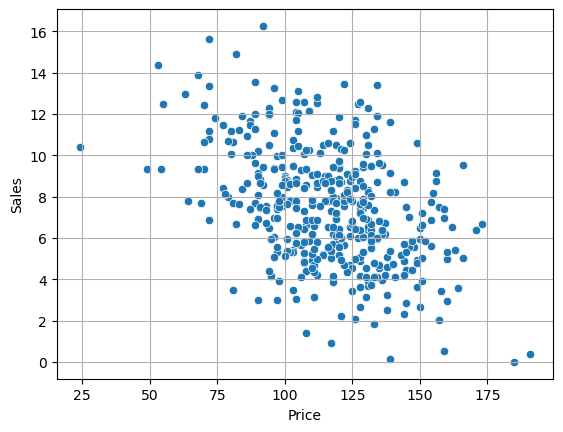

상관계수 : -0.4449507278465726, p-value : 7.61818701191294e-21


In [49]:
eda2_nn(data, target, var)

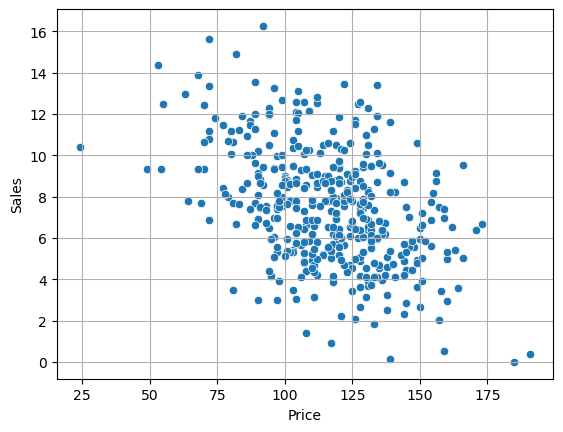

In [31]:
sns.scatterplot(x = var, y = target, data = data)
plt.grid()
plt.show()

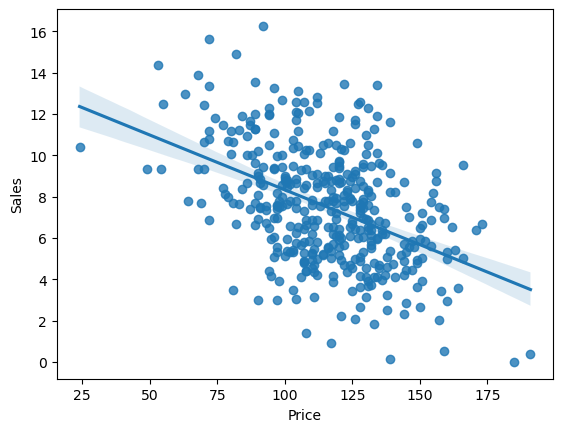

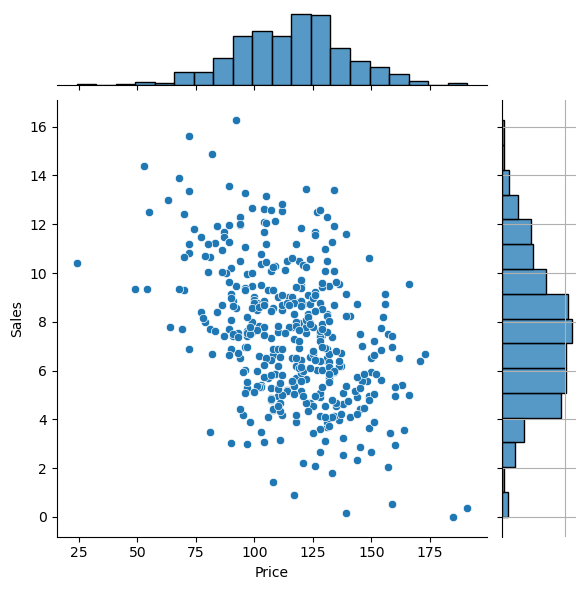

In [32]:
sns.regplot(x = var, y = target, data = data)
sns.jointplot(x = var, y = target, data = data)
plt.grid()
plt.show()

2) 수치화 : 상관분석

In [34]:
result = spst.pearsonr(data[var], data[target])
print(f"상관계수 : {result[0]}, p-value : {result[1]}")

상관계수 : -0.4449507278465726, p-value : 7.61818701191294e-21


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 상관계수가 양 끝 값에 위치하지 않아서 상관 관계가 강하지 않다. 다만 p-value가 0.05 미만이라 유의미한 분석이다
- 음의 상관계수라 가격이 비쌀수록 적게 팔린다
- 평균 가격에서 많이 팔리는 것을 확인 가능하다.
- 가격이 싸거나 비싸도 팔리긴 하는데 품질이나 이벤트랑 관련있는지 확인하고 싶지만 feature에 없어서 유감

### (4) Age -> Sales

1) 시각화 : scatter

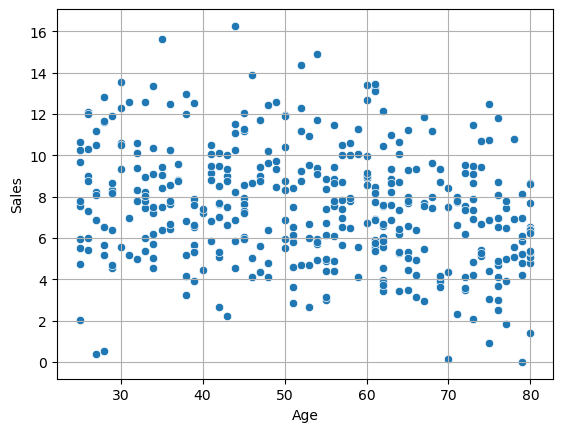

상관계수 : -0.2318154396045765, p-value : 2.7889498393711916e-06


In [50]:
eda2_nn(data, target, "Age")

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (5) CompPrice -> Sales

1) 시각화 : scatter
- 타사가격 -> 판매량 ???
- 가설 업데이트 해야 한다
- 자사가격이 타사보다 쌀 수록 판매량이 높다?

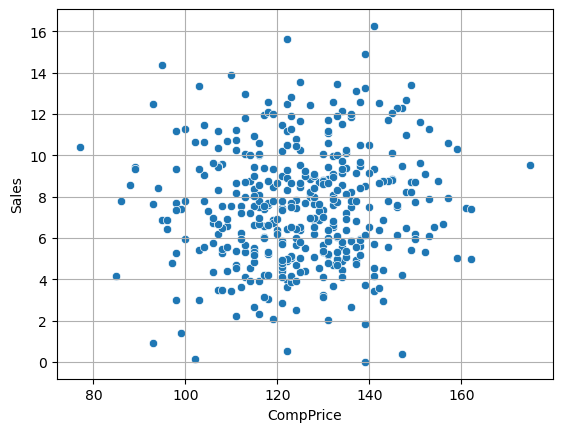

상관계수 : 0.06407872955062152, p-value : 0.2009398289418295


In [51]:
eda2_nn(data, target, "CompPrice")

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 함께 추가 분석

In [53]:
data["Diff_price"] = data["CompPrice"] - data["Price"]
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US,Diff_price
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,Yes,Yes,28
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes,33
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes,20
4,4.15,141,64,3,340,128,Bad,38,Yes,No,13


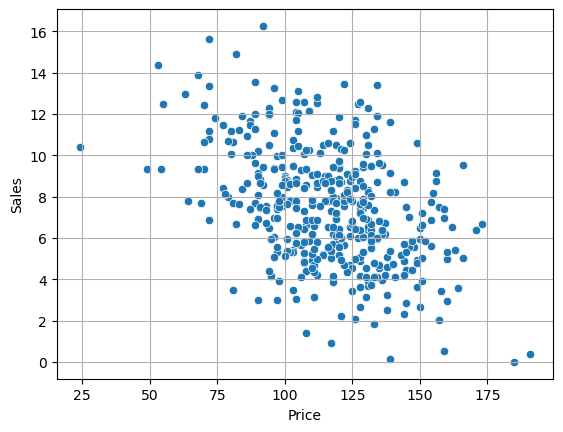

상관계수 : -0.4449507278465726, p-value : 7.61818701191294e-21


In [55]:
eda2_nn(data, target, "Price")

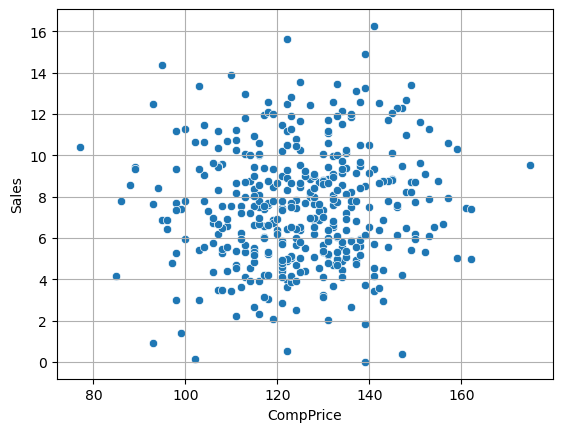

상관계수 : 0.06407872955062152, p-value : 0.2009398289418295


In [56]:
eda2_nn(data, target, "CompPrice")

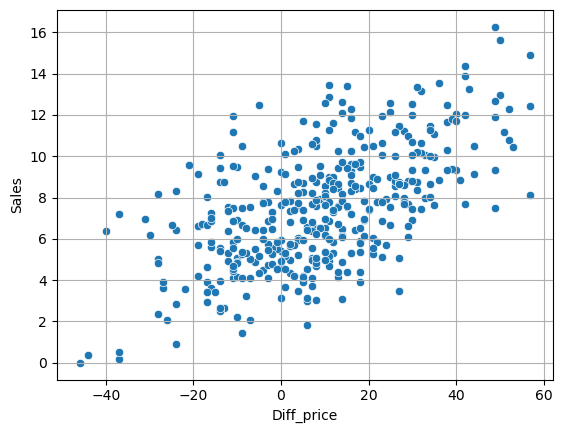

상관계수 : 0.5979217124533921, p-value : 3.877120641788835e-40


In [58]:
eda2_nn(data, target, "Diff_price")

### (6) Income -> Sales

1) 시각화 : scatter

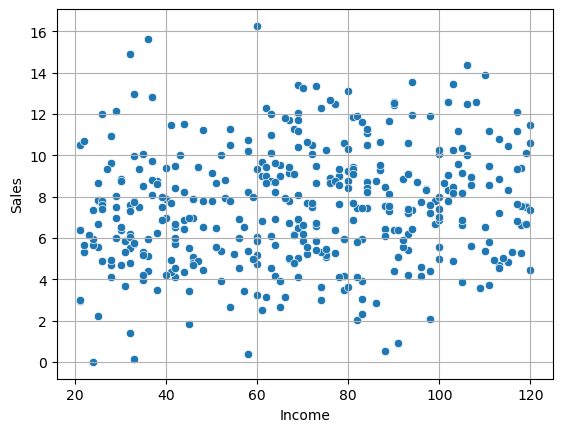

상관계수 : 0.15195097946754424, p-value : 0.0023096704539517627


In [59]:
eda2_nn(data, target, "Income")

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## 2.범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### (1) ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

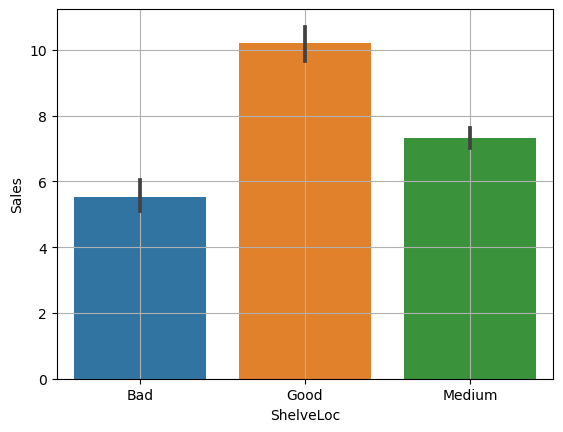

In [14]:
#진열 상태에 따라 판매량에 차이가 있는가?
var = 'ShelveLoc'

sns.barplot(x = var, y = target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [17]:
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [18]:
d_b = data.loc[data[var] == 'Bad', target]
d_m = data.loc[data[var] == 'Medium', target]
d_g = data.loc[data[var] == 'Good', target]
spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (2) Urban -> Sales

1) 시각화 : 평균비교 barplot

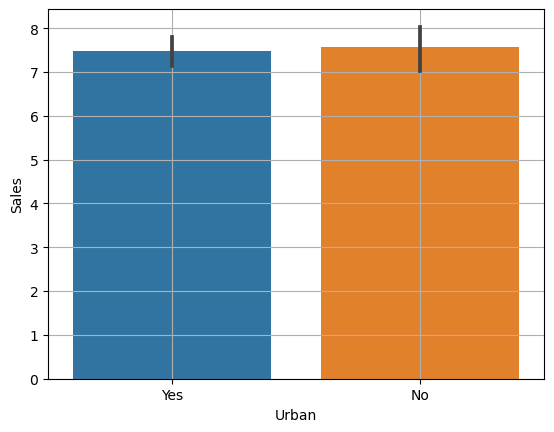

In [66]:
var = "Urban"
sns.barplot(x = var, y = target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [40]:
data["Urban"].unique()

array(['Yes', 'No'], dtype=object)

In [67]:
yes = data.loc[data[var] == "Yes", target]
no = data.loc[data[var] == "No", target]
print(spst.ttest_ind(yes, no))
print(spst.f_oneway(yes, no))

Ttest_indResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775)
F_onewayResult(statistic=0.09465065557659712, pvalue=0.7585069603942085)


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 시각화 결과로는 urban과 sales간에 관계가 없어보인다
- 수치화 결과로 보니 판매량과 도시에 매장이 있는 여부는 음의 상관계수를 가지고 있지만, p-value 값이 0.05보다 커서 관련이 없다

### (3) US-> Sales

1) 시각화 : 평균비교 barplot

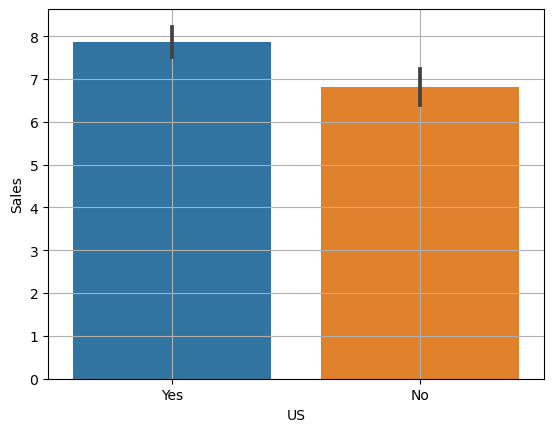

In [68]:
var = "US"
sns.barplot(x = var, y = target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [70]:
yes = data.loc[data[var] == "Yes", target]
no = data.loc[data[var] == "No", target]
print(spst.ttest_ind(yes, no))
print(spst.f_oneway(yes, no))
#결과가 다르지 않다, t통계량 ** 2 = F

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)
F_onewayResult(statistic=12.886224277474618, pvalue=0.0003723395870148404)


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

p-value는 0.05보다 작아서 통계량이 유의미하다
t-통계량은 유의미하다
근데 t-통계량 : 두 평균의 차이(수가 크면 차이가 크다)

## 3.관계 정리하기

① 강한관계

Diff_Price, Shelveloc

② 중간관계

Age, Income, Price, US, Advertising

③ 관계없음

Pop, ComPrice, Urban